# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [14]:
# Your code here. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

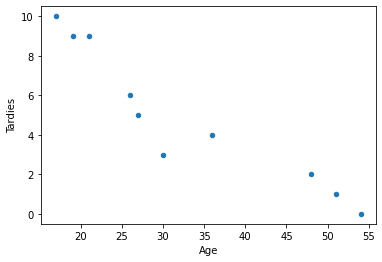

In [9]:
# Your code here.
student_data.plot.scatter("Age", "Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# As age advances there are less tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# Your response here.
print(student_data.corr(), student_data.cov())

# correlation is easier to understand
# correlation is linear

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Your response here.

slope, intercept, r_value, p_value, std_err = stats.linregress(student_data.Age, student_data.Tardies)

print(f"Tardies = {slope} * Age + {intercept}")


Tardies = -0.2428207709159808 * Age + 12.888803363135768


Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

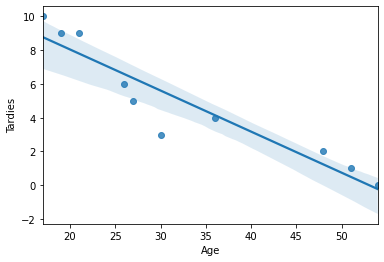

In [17]:
# Your code here.
sns.regplot(x="Age", y="Tardies", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [56]:
# Your response here. 
from sklearn.metrics import mean_squared_error


In [57]:
print(f"r squared : {r_value}, p value : {p_value}, rmse : {mean_squared_error(student_data.Tardies, slope * student_data.Age + intercept)**(1/2)}")

# Seems like a good indicator from p_value, r squared and rmse. The sample is weak.

r squared : -0.9391626886887121, p value : 5.56665383455343e-05, rmse : 1.1540884648655088


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [24]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("../Regression-Analysis/vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [74]:
# Your response here. 
vehicles[["CO2 Emission Grams/Mile", "Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]].corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [86]:
# Your response here.
Y = vehicles["CO2 Emission Grams/Mile"]
X = vehicles[["Cylinders", "Fuel Barrels/Year"]]
import statsmodels.api as sm
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
predictions

0        513.909000
1        674.910982
2        545.093569
3        674.910982
4        552.571521
            ...    
35947    246.833668
35948    246.833668
35949    246.833668
35950    246.833668
35951    253.565575
Length: 35952, dtype: float64

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          1.139e+07
Date:                     Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                             14:30:07   Log-Likelihood:                     -1.5772e+05
No. Observations:                    35952   AIC:                                  3.154e+05
Df Residuals:                        35950   BIC:                                  3.155e+05
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Cylinders             3.7390      0.086     43.449      0.000       3.570       3.908
Fuel Barrels/Year    25.7341      0.029    901.497      0.000      25.678      25.790
==============================================================================
Omnibus:                    86840.574   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        847482098.785
Skew:                          25.444   Prob(JB):                         0.00
Kurtosis:                     753.435   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
from sklearn.preprocessing import StandardScaler
columns = ["CO2 Emission Grams/Mile", "Cylinders", "Fuel Barrels/Year"]

scaler = StandardScaler()
std_vehicles = pd.DataFrame(scaler.fit_transform(vehicles[columns]), 
                            columns=columns
                           )
std_vehicles

,CO2 Emission Grams/Mile,Cylinders,Fuel Barrels/Year
0,0.398528,-1.005601,0.398406
1,1.749543,0.133841,1.733866
2,0.672953,-1.005601,0.669671
3,1.749543,0.133841,1.733866
4,0.672953,0.133841,0.669671
...,...,...,...
35947,-1.942870,-1.575323,-1.892278
35948,-1.951269,-1.575323,-1.892278
35949,-1.942870,-1.575323,-1.892278
35950,-1.926071,-1.575323,-1.892278


In [98]:
Y = std_vehicles["CO2 Emission Grams/Mile"]
X = std_vehicles[["Cylinders", "Fuel Barrels/Year"]]
import statsmodels.api as sm
model = sm.WLS(Y,X)
results = model.fit()
predictions = results.predict(X)
results.summary(X)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                                                                                                                                                                                            WLS Regression Results                                                                                                                                                                                                                                                            
==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================
Dep. Variable:            Cylinders  Fuel Barrels/Year
0      -1.005601           0.398406
1       0.133841           1.733866
2      -1.005601           0.669671
3       0.133841           1.733866
4       0.133841           0.669671
...          ...                ...
35947  -1.575323          -1.892278
35948  -1.575323          -1.892278
35949  -1.575323          -1.892278
35950  -1.575323          -1.892278
35951  -1.575323          -1.833719

[35952 rows x 2 columns]   R-squared (uncentered):                   0.974
Model:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   WLS   Adj. R-squared (uncentered):              0.974
Method:                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Least Squares   F-statistic:                          6.666e+05
Date:                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                                                                                                                                                                                                                                                                                                                                                                                                                                                                               14:49:11   Log-Likelihood:                          14417.
No. Observations:                                                                                                                                                                                                                                                      

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [109]:
# Your code here. 

invited = [1, 3, 4, 6, 8, 9, 11, 14]
attendants = [1, 2, 4, 4, 5 ,7, 8, 13]
absents = [invited[i] - attendants[i] for i in range(len(invited))]

parties = pd.DataFrame({'invited': invited, 'absents': absents})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='invited', ylabel='absents'>

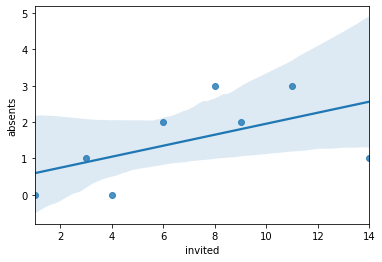

In [110]:
# Your code here.
sns.regplot("invited", "absents", parties)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [73]:
# Your response here. 
slope, intercept, r_value, p_value, std_err = stats.linregress(parties.invited, parties.attended)

print(f"Attendants = {slope} * invited + {intercept}")

Attendants = 0.8484848484848485 * invited + -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 